# Simple Fourier series example

This example shows the use of the Fourier series synthesis expression for the reconstruction of a given signal from its coefficients.
$$ x(t) = \sum_{n=-\infty}^\infty c_n e^{in\omega_ot}$$
In this case the signal to be reconstructed is a polar sequence taking values in {-1,1} with periodicity $T_0=1$ n even.

As is known from the class material, the Fourier analysis expansion (coefficients) for this signal are given by: 
$$ c_n = \begin{cases} 0 & n \text{ even} \\ \frac{2}{in\pi} & n \text{ odd} \end{cases} $$

Populating the interactive namespace from numpy and matplotlib


D:\Sw4Engineering\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide
D:\Sw4Engineering\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


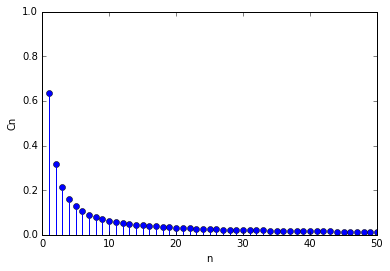

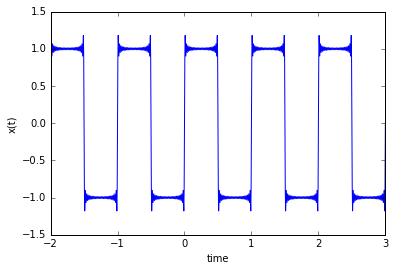

(<matplotlib.text.Text at 0x271dc6c28d0>,
 None)

In [2]:
# Script to calculate the Fourier series of a polar signal of 50% duty cycle
# Germán Augusto Ramírez Arroyave
# Universidad Católidca de Colombia
# Last review august 2015

%pylab inline
import numpy as np

N = 51
n = np.arange(0,N)
T0 = 1
omega0 = 2*np.pi/T0
support = np.linspace(-2*T0,3*T0,1001)
A = 1

x = 0
Cn = np.zeros(N)

Cn = 2/(1j*n*np.pi)

stem(n,np.absolute(Cn)), ylim([0,1])
xlabel('n'), ylabel('Cn'), show()

for n in range(1,N,2):
    x += 2*np.absolute(Cn[n])*np.cos(n * omega0 *support + np.angle(Cn[n]))
x = A*x

plot(support,x), ylim([-1.5,1.5])
xlabel('time'), ylabel('x(t)'), show()

### Activity I

Review the code given above and after properly commenting it, answer the following questions:
1. What does the import numpy line means?
2. Why is (dis)advantageous to use pylab inline
3. What are the major differences to Matlab programming you find in this first approach
4. Read reference: http://wiki.scipy.org/NumPy_for_Matlab_Users
5. How does this code works according to the mathematical expression of the Fourier series?

### Activity II

Consider the MATLAB script below and answer the questions stated therein

In [3]:
# Script to calculate the Fourier series of a polar signal of 50% duty cycle
# Germán Augusto Ramírez Arroyave
# Universidad Católica de Colombia
# Last review august 2015

%% Parameter definition, 
N = 21;         % Amount of summed coefficients 
A = 1;          % Amplitude
To = 1;         % Period
wo = 2*pi/To;
fs = 200*wo;    % Sampling frequency
t = 0:1/fs:2*To;

%% Statement of the coefficients
cn = zeros(1,N);
n = 1:2:N;
cn(n) = 2*A ./ (1i*n*pi);

%% Signal reconstruction
% There are given some alternatives below, but beware, ¡There is a mistaken one! ¿Which one? ¿Why? (Suggestion: Enable one at a time and see what happens)
x = 0;

% Alternative 1: direct implementation of the series sum
if ~mod(N,2)    
	N = N+1;
end
for n = -N:2:N   
	x = x + 2*A /(1i*n*pi) * exp(1i*n*wo*t); 
end

% Alternative 2: use the magnitude spectrum's symmetry and sum only the positive coefficients
% for k = 1:2:N 
%     x = x + 2*cn(k) * exp(1i*k*wo*t); 
% end

% Alternative 3: use the magnitude and angle representation of the Series
% for k = 1:2:N 
%     x = x + 2*abs(cn(k)) * cos(k*wo*t + angle(cn(k))); 
% end

% Alternative 4:use the expansion for possitive terms of the sum for real signals
% for k = 1:2:N 
%     x = x + cn(k) * exp(1i*k*wo*t) + conj(cn(k)) * exp(-1i*k*wo*t); 
% end

figure; plot(t,real(x));
title('Reconstrucción de la señal'); ylabel('Real de x(t)'); xlabel('t (seg)');
figure; plot(t,imag(x));
title('Reconstrucción de la señal'); ylabel('Imag de x(t)'); xlabel('t (seg)');

SyntaxError: invalid syntax (<ipython-input-3-ac9284cf7d01>, line 6)